In [24]:
import os
import re
import sklearn
import numpy as np
import pandas as pd
from wombat.engine import ml_model
from wombat.engine import parse_input_description as parse_title
from wombat.models import Item
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.externals import joblib
from sklearn.ensemble import RandomForestRegressor
from wombat.models import dbsession, engine, ItemType, ItemAdjective
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (20,12)

In [25]:
df = ml_model.canonical_df
# split data into train and test group
df['is_train'] = np.random.uniform(0, 1, len(df)) <= .75

# copy of train before we delete the 'rent_per_week' and 'title' field. We want title 
# we will need these things before we make dummy variables
df_full_training = df[df['is_train']==True]
df_full_test = df[df['is_train']==False]

# get one-hot columns for brands 
dummy_brands = pd.get_dummies(df['brand'])
df = pd.concat([df, dummy_brands], axis = 1)

df = df.drop('brand', axis = 1)

# get one-hot columns for item_types
dummified_items = pd.get_dummies(df['item_type'])
df = pd.concat([df, dummified_items], axis = 1)
df = df.drop('item_type', axis = 1)
df_brands = df

In [21]:
# get list of adjective features form database
features_adj = [f.name for f in dbsession.query(ItemAdjective).all()]
item_types   = [item.name for item in dbsession.query(ItemType).all()]

tokenized_titles = []
for title in df['title']:
    parse_title.create_one_hot_row_adj(title, features_adj)
    tokenized_titles.append(parse_title.create_one_hot_row_adj(title, features_adj))
df_adj = pd.DataFrame(tokenized_titles, columns = features_adj)

features_adj = [f.name for f in dbsession.query(ItemAdjective).all()]

item_types   = [item.name for item in dbsession.query(ItemType).all()]

tokenized_titles = []
for text_array in df[['title', 'description']].values:
    try:
        text = ' '.join(text_array)
    except TypeError:
        text = title
    #parse_title.create_one_hot_row_adj(text, features_adj)
    tokenized_titles.append(parse_title.create_one_hot_row_adj(text, features_adj))
df_adj = pd.DataFrame(tokenized_titles, columns = features_adj)

In [26]:
df = pd.concat([df_brands, df_adj], axis = 1)

In [27]:
features = df.columns.drop(['rent_per_week', 'title', 'cost', 'is_train', 'description']) # just column names
train, test = df[df['is_train']==True], df[df['is_train']==False]

In [28]:
y = train['rent_per_week']
print("Shape of test df: {}".format(test.shape))
print('Number of observations in the test data: {}'.format(df_full_test.shape))
clf = RandomForestRegressor()
clf.fit(train[features], train['rent_per_week'])
model_dir = '/home/patrick/Dropbox/insight/wombat/wombat/engine/stat_model_pickles'
model_path = os.path.join(model_dir, 'rfr_v0.3_with_adj.pkl')
joblib.dump(clf, model_path)
#call this with: clf = joblib.load('rfr_v0.2.pkl')

Shape of test df: (1433, 1826)
Number of observations in the test data: (1433, 7)


['/home/patrick/Dropbox/insight/wombat/wombat/engine/stat_model_pickles/rfr_v0.3_with_adj.pkl']

Coefficients:  [ 0.27336448]
Mean squared error: 383.15
Variance score: 0.19


/home/patrick/.virtualenvs/stylelend/lib/python3.5/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/patrick/.virtualenvs/stylelend/lib/python3.5/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,brand,item_type,title,error,description
5760,Yves Saint Laurent,dresses,Yves Saint Laurent,554.700000,Convertible 100% silk matte Jersey dress that...
4884,Sherry Hill,dresses,Marilyn,500.100000,None
1306,Chloe,dresses,Chloe Yellow Dress,471.400000,Chloe SS/15 runway yellow silk dress.\nVibrant...
5656,Michael Kors,dresses,Cosmo Orange Gown,436.500000,Feel special when you step into this silk godd...
5161,Zac Posen,dresses,Gorgeous Orange Runway Gown,426.200000,"Luxurious and opulent, adorn yourself with thi..."
2755,Herve Leger,dresses,Lilyanna,380.966667,Lilyanna one-shoulder metallic bandage gown
340,Chanel,dresses,Pearl studded knit dress,372.500000,A lovely comfortable dress that will make you ...
2655,Givenchy,accessories,Antigona - Medium,351.100000,Medium Antigona bag in black leather
2839,Herve Leger,dresses,Black Mesh Beaded Gown,347.166667,Long black form fitting mesh gown with criss c...
3170,Monique Lhuillier,dresses,The Ballgown,338.900000,Indigo/black tulle. Off-the-shoulder neckline....


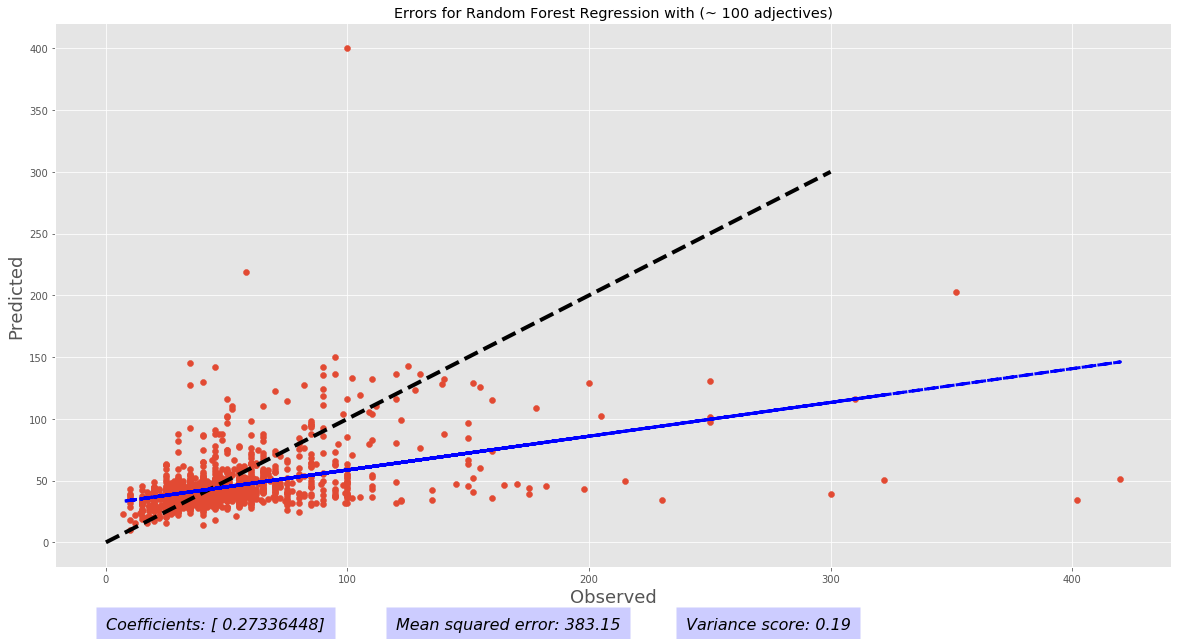

In [33]:
from sklearn import linear_model

rfr_predicted = clf.predict(test[features])

# Create linear regression object for predicted vs measured
reg = linear_model.LinearRegression()

x = test['rent_per_week'].values.reshape(-1,1)
y = np.array(rfr_predicted)

# Train the model using the training sets
reg.fit(x, y)
# The coefficients
print('Coefficients: ', reg.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((reg.predict(x) - y) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % reg.score(x, y))

# Plot outputs
fig, ax = plt.subplots(figsize=(20, 10))
ax.scatter(x = test['rent_per_week'], y = rfr_predicted)
#stopping_value = np.minimum(test['rent_per_week'].max, np.maximum(rfr_predicted))
stopping_value = 300
ax.plot([0, stopping_value], [0, stopping_value], 'k--', lw=4)
ax.set_title('Errors for Random Forest Regression with (~ 100 adjectives)')
ax.set_xlabel('Observed', fontsize=18)
ax.set_ylabel('Predicted', fontsize=18)
ax.plot(x, reg.predict(x), 'k--', color='blue', linewidth=3)

ax.text(0, -70, 'Coefficients: {}'.format(reg.coef_), style='italic', fontsize=16,
        bbox={'facecolor':'blue', 'alpha':0.2, 'pad':10})
ax.text(120, -70, "Mean squared error: %.2f"
      % np.mean((reg.predict(x) - y) ** 2), style='italic', fontsize=16,
        bbox={'facecolor':'blue', 'alpha':0.2, 'pad':10})
ax.text(240, -70, 'Variance score: %.2f' % reg.score(x, y), style='italic', fontsize=16,
        bbox={'facecolor':'blue', 'alpha':0.2, 'pad':10})

x = test['rent_per_week']
df_full_test['predicted_rent'] = rfr_predicted
df_full_test['error'] = df_full_test[['rent_per_week', 'predicted_rent']].sum(axis=1)
df_full_test.loc[df_full_test['error']>200][['brand', 'item_type', 'title', 'error', 'description']].sort_values('error', ascending = 0)

In [130]:
 # make plotly plot
import plotly.plotly as py
import plotly.graph_objs as go

brands = df_full_training['brand'].values
item_types = df_full_training['item_type'].values
titles = df_full_training['title'].values
labels = []
for i in list(range(0, len(brands))):
    labels.append("{}, {}, {}".format(brands[i], item_types[i], titles[i]))

data = [
    go.Scatter(
        x=test['rent_per_week'],
        y=rfr_predicted,
        mode='markers',
        text=labels
    )
]
layout = go.Layout(
    title='Measured vs Predicted outcomes using Random Forest model'
)
fig = go.Figure(data=data, layout=layout)
plot_url = py.plot(fig, filename='meas-v-pred-rfr-2017-06-12')

Coefficients: 
 [ 0.27941375]
Mean squared error: 362.16
Variance score: 0.18


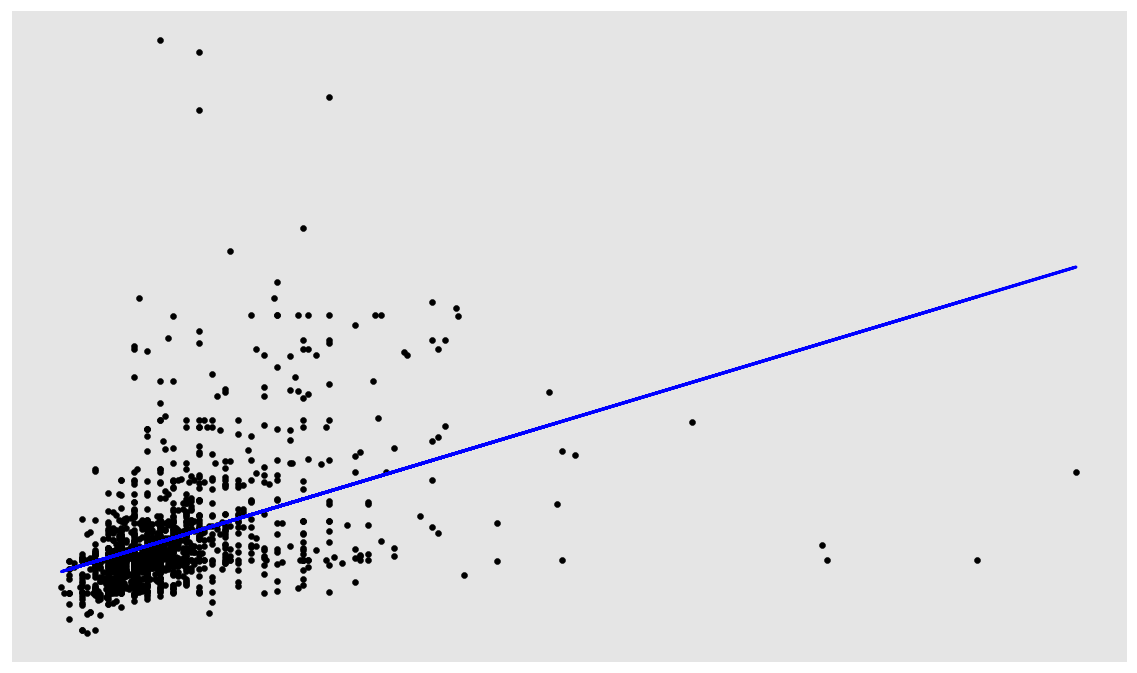

In [131]:
from sklearn import linear_model
# Create linear regression object
reg = linear_model.LinearRegression()

x = test['rent_per_week'].values.reshape(-1,1)
y = np.array(rfr_predicted)

# Train the model using the training sets
reg.fit(x, y)
# The coefficients
print('Coefficients: \n', reg.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((reg.predict(x) - y) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % reg.score(x, y))

# Plot outputs
plt.scatter(x, y,  color='black')
plt.plot(x, reg.predict(x), color='blue',
         linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()